In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [8]:
from scipy.spatial.distance import euclidean

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

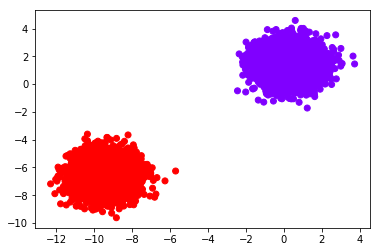

In [47]:
#generating data
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=10000, n_features=2, 
                           centers=2, cluster_std=0.8,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

plt.show()

In [48]:
x = pd.DataFrame(data[0])
x['labels'] = data[1]
x.fillna(0, inplace=True)

In [49]:
dunn(x['labels'], euclidean_distances(x.drop('labels', axis=1)))

2.8428005602031243

## Calculate the diameters of all clusters

## Gabriel: AQUI!!!!!!

Primeiramente, data[0] é o array das features, isto é, cada linha (ou elemento) de data[0] é uma tupla onde os elementos são as coordenadas do ponto

In [170]:
data[0][0] #isto é um ponto!

array([3.26441293, 6.92916357])

Além disso, data[1] é o array das labels

In [186]:
#x recebe as features
#labels recebe o array das labels

labels = data[1]
x = data[0]

Aqui, label_1 recebe os índices, do array de labels, nos quais a label é 1, ou seja, os índices referentes ao cluster 1

In [190]:
label_1 = [i for i, e in enumerate(labels) if e == 1]

In [216]:
label_1

[2,
 7,
 14,
 16,
 19,
 21,
 22,
 23,
 27,
 31,
 35,
 36,
 44,
 48,
 51,
 55,
 56,
 57,
 64,
 67,
 69,
 82,
 88,
 92,
 94,
 95,
 96,
 101,
 102,
 104,
 106,
 107,
 108,
 110,
 116,
 118,
 119,
 123,
 125,
 127,
 130,
 134,
 142,
 143,
 146,
 157,
 159,
 163,
 164,
 168,
 172,
 175,
 178,
 181,
 189,
 193,
 205,
 209,
 210,
 215,
 216,
 219,
 222,
 224,
 225,
 227,
 230,
 233,
 234,
 235,
 239,
 241,
 243,
 244,
 247,
 250,
 253,
 256,
 257,
 259,
 261,
 266,
 273,
 275,
 279,
 281,
 283,
 289,
 296,
 298,
 301,
 302,
 303,
 305,
 306,
 308,
 309,
 310,
 312,
 313,
 314,
 315,
 317,
 318,
 322,
 323,
 325,
 328,
 329,
 332,
 333,
 347,
 351,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 368,
 371,
 373,
 374,
 384,
 387,
 392,
 396,
 398,
 399,
 402,
 403,
 407,
 411,
 416,
 417,
 419,
 420,
 422,
 424,
 426,
 436,
 437,
 442,
 443,
 444,
 445,
 450,
 452,
 454,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 468,
 470,
 471,
 474,
 478,
 485,
 487,
 496,
 500,
 502,
 506,
 507,
 508,
 51

In [218]:
np.append(cluster_1, (np.append(x[2], 1.0)))
np.append(cluster_1, (np.append(x[7], 1.0)))

array([-12.06018828,  -7.61042468,   1.        ])

### Aqui que não tá pegando!!!!!!!!!!!!!

In [213]:
#essa era a ideia para construir o cluster 1, mas não dá certo, essa merda fica retornando um array vazio
cluster_1 = []
cluster_1 = np.array(cluster_1)
for i in label_1:
    np.append(cluster_1, (np.append(x[i], 1.0)))

In [214]:
cluster_1

array([], dtype=float64)

In [46]:
def diameters(data, number_of_clusters): #testada
    n_clusters = np.arange(0, number_of_clusters)
    diameters = np.array([])
    #for each cluster
    for c in n_clusters:
        distances = np.array([])
        
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        #calculates distance between all points in  the cluster
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                distances.append(euclidean(cluster.iloc[i,:], cluster.iloc[j,:]))
        #appends the maximum distance between two points in the cluster,
        #i.e., its diameter, to the list of diameters of all clusters
        diameters.append(max(distances))
    
    return diameters

In [8]:
def cluster_midpoints(df, number_of_clusters):
    #n_clusters = np.arange(0, number_of_clusters)
    midpoints = []
    
    for c in range(number_of_clusters):
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        midpoint = []
        for i in range(len(cluster.columns)):
            midpoint.append(np.mean(cluster.iloc[:,i]))
        midpoints.append(midpoint)
    
    return midpoints

In [9]:
def midpoints_dist(df, number_of_clusters, minDist): #erro aqui!
    midpoints = cluster_midpoints(df, number_of_clusters)
    dist_midpoints = []
    
    for i in range(len(midpoints)):
        for j in range(i+1, len(midpoints)):
            dist_midpoints.append(euclidean(midpoints[i], midpoints[j]))
    
    if minDist == True:
        return min(dist_midpoints)
    else:
        return dist_midpoints

In [10]:
midpoints_dist(df, 4, minDist=True)

NameError: name 'df' is not defined

### Calculate general Dunn index

In [48]:
def dunn_index(data, number_of_clusters):
    dunn_index = midpoints_dist(df, 4, minDist=True)/max(diameters(df, number_of_clusters))
    return dunn_index

In [14]:
round(dunn_index(df, 4), 4)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.8433

### A partir daqui: código da internet

In [2]:
import numpy as np


def normalize_to_smallest_integers(labels):
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.

    :param labels: the list to be normalized
    :returns: a numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c


def dunn(labels, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, given by the distances between its
    two closest data points, and :math:`diam(c_k)` is the diameter of cluster
    :math:`c_k`, given by the distance between its two farthest data points.
    
    The bigger the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = normalize_to_smallest_integers(labels)

    unique_cluster_distances = np.unique(min_cluster_distances(labels, distances))
    max_diameter = max(diameter(labels, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter


def min_cluster_distances(labels, distances):
    """Calculates the distances between the two nearest points of each cluster.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    """
    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] > min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances

    
def diameter(labels, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :returns:
    """
    labels = normalize_to_smallest_integers(labels)
    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] == labels[ii] and distances[i, ii] > diameters[labels[i]]:
                diameters[labels[i]] = distances[i, ii]
    return diameters

In [23]:
x

,0,1,2,3,4,labels
0,0.236243,-2.862409,-8.187646,6.178162,8.152271,2
1,1.523493,-8.182019,7.143758,4.040586,-6.629591,1
2,3.790533,-3.919686,7.164391,5.861425,-4.473478,1
3,2.354126,-4.800975,6.455403,1.790270,-4.971959,1
4,7.075494,-4.848203,7.312317,6.418761,-5.207236,1
5,-0.148094,3.583692,-7.632100,-8.035919,1.157153,0
6,8.560286,-6.644432,6.726596,2.913428,-7.911728,1
7,9.869713,-4.231725,7.459866,4.088911,-7.115475,1
8,5.498369,-3.371497,8.129171,4.304715,-7.685629,1
9,7.756843,-4.316828,6.625664,5.265476,-1.051138,1


In [73]:
"""from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

l = load_iris()
labels = l['target']
data = l['data']
k = KMeans(n_clusters=3).fit_predict(data)
dund = dunn(labels, euclidean_distances(data))
dunk = dunn(k, euclidean_distances(data))

#print(x, c, dund, dunk)"""

"from sklearn.datasets import load_iris\nfrom sklearn.cluster import KMeans\n\nl = load_iris()\nlabels = l['target']\ndata = l['data']\nk = KMeans(n_clusters=3).fit_predict(data)\ndund = dunn(labels, euclidean_distances(data))\ndunk = dunn(k, euclidean_distances(data))\n\n#print(x, c, dund, dunk)"

In [74]:
#iris = pd.DataFrame(l['data'])
#iris['labels'] = l['target']

#iris

In [49]:
dunn_index(data, 3)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.8433480009754464